# ProtPeptigram

![Python Package](https://github.com/Sanpme66/ProtPeptigram/actions/workflows/python-package.yml/badge.svg)
[![PyPI version](https://badge.fury.io/py/protpeptigram.svg)](https://badge.fury.io/py/protpeptigram)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)

## Visualization of Immunopeptides Mapped to Source Proteins Across Multiple Samples

ProtPeptigram provides a comprehensive visualization platform for mapping immunopeptides to their source proteins across different biological samples. This tool enables researchers to identify peptide coverage patterns, analyze density distributions, and compare peptide presentations between experimental conditions.


[18:02:05] Loaded 17951 peptide entries from ../data/JCI146771_Mouse_peptides_peaks_online.csv  ]8;id=996681;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=609741;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=99551;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=458298;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

[18:02:06] Loaded 34444 protein sequences from                                                 ]8;id=196398;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=259511;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ../data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                        

           Removed 164 contaminant entries                                                     ]8;id=846372;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=727311;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#266\266]8;;\

           Removed 16128 entries below intensity threshold or minimum sample count             ]8;id=888121;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=264805;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#274\274]8;;\

[18:02:07] Created formatted data with 3599 peptide-protein-sample combinations                ]8;id=736960;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=588745;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#328\328]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=184820;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=769773;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#329\329]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

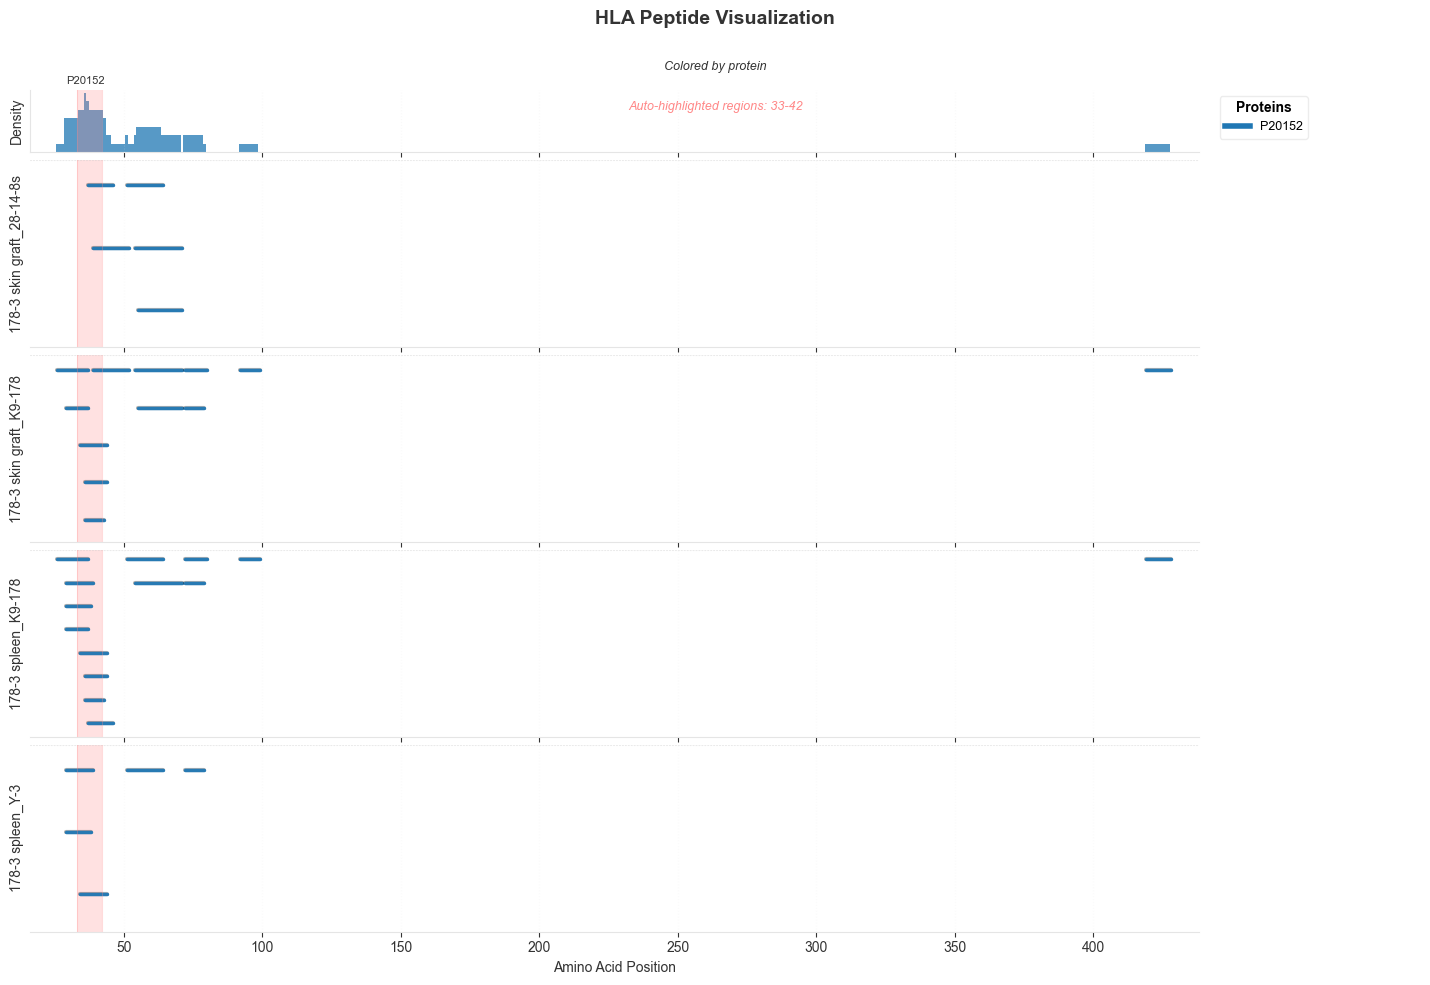

In [10]:
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("../data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("../data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=1000,
    min_samples=2
)

# Create visualizations
viz = ImmunoViz(formatted_data)
fig, _ = viz.plot_peptigram(
    protein_ids=["P20152"],
    group_by="Sample",
    color_by="protein",
    title="HLA Peptide Visualization"
)

# Save visualization
fig.savefig("protein_visualization.png", dpi=300, bbox_inches="tight")

## Without highlight

In [ ]:
# !pip install -e ../.

Obtaining file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ProtPeptigram
    Found existing installation: ProtPeptigram 1.0.0.dev0
    Uninstalling ProtPeptigram-1.0.0.dev0:
      Successfully uninstalled ProtPeptigram-1.0.0.dev0
  DEPRECATION: Legacy editable install of ProtPeptigram==1.0.0.dev0 from file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram (setup.py develop) is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for ProtPeptigram


In [23]:
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("../data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("../data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=0,
    min_samples=2
)

# # Create visualizations
# viz = ImmunoViz(formatted_data)
# # fig, _ = viz.plot_peptigram(
# #     protein_ids=["P20152"],
# #     group_by="Sample",
# #     color_by="protein",
# #     title="HLA Peptide Visualization"
# # )


# fig, _ = viz.plot_peptigram(
#     ['P19096'],#'P32261'], #['P20152','P32261','Q9QX47'],
#     group_by='Sample',
#     color_by='test',
#     figsize=(14, 12),
#     title="Mouse Immunopeptidomic Source Protein-Peptide Visualisation",
#     color_by_protein_and_intensity=False,
#     # Assign specific colormaps to each protein
#     # intensity_cmaps=["Blues", "Reds", "Greens", "Purples"],
#     protein_cmap="Set1",
#     external_legend=True,
#     highlight=False,
#     auto_highlight=False,
#     highlight_alpha=100,
#     auto_highlight_threshold=0.8,
#     auto_highlight_window=10,
#     dpi=120
# )


# # # Save visualization
# # fig.savefig("protein_visualization_without_h.png", dpi=300, bbox_inches="tight")



[12:03:45] Loaded 17951 peptide entries from ../data/JCI146771_Mouse_peptides_peaks_online.csv  ]8;id=9333;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=729174;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=161231;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=239873;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 34444 protein sequences from                                                 ]8;id=981430;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=320248;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ../data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                        

           Removed 164 contaminant entries                                                     ]8;id=729527;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=264037;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#266\266]8;;\

           Removed 16128 entries below intensity threshold or minimum sample count             ]8;id=626910;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=246560;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#274\274]8;;\

[12:03:46] Created formatted data with 3599 peptide-protein-sample combinations                ]8;id=233150;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=773322;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#328\328]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=239781;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=662655;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/.venv/lib/python3.12/site-packages/ProtPeptigram/DataProcessor.py#329\329]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

In [21]:
!ls

example.ipynb                       protein_visualization_without_h.png
protein_visualization.png
